**Effects of Advertising on Sales**

**LVC 1 - Introduction to Supervised Learning: Regression**

**Context and Problem**:

- An interesting application of regression is to quantify the effect of advertisement on sales. Various channels of advertisement are newspaper, TV, Radio.
- In this case study, **we will have a look at the advertising data of a company and try to see if its effects on sales**
- We also **try to predict the sales given the different parameters of advertising**.

**Data Information**
The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:
- TV: Independent variable quantifying budget for TV ads
- Radio: Independent variable quantifying budget for radio ads
- News: Independent variable quantifying budget for news ads
- Sales: Dependent variable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('./data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
data.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [8]:
data[data.duplicated()]

,TV,Radio,Newspaper,Sales


TV
Skew -0.06985336213274573


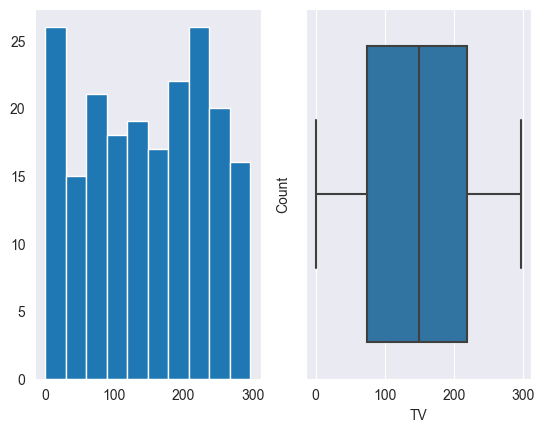

Radio
Skew 0.09417463149664404


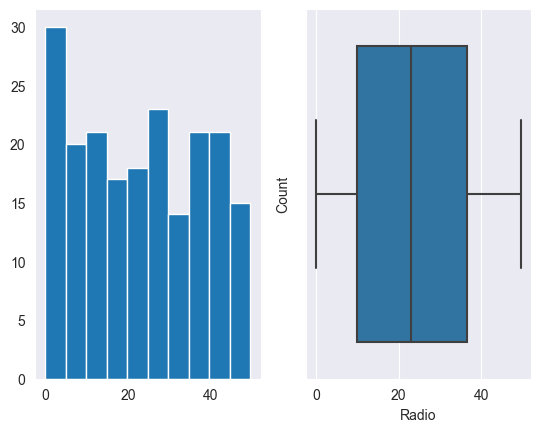

Newspaper
Skew 0.8947204074986175


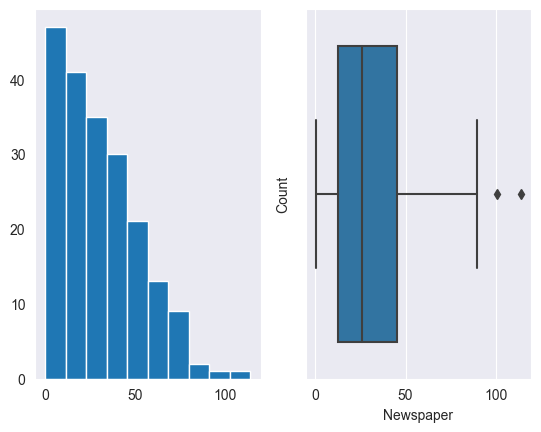

Sales
Skew 0.4075714250767127


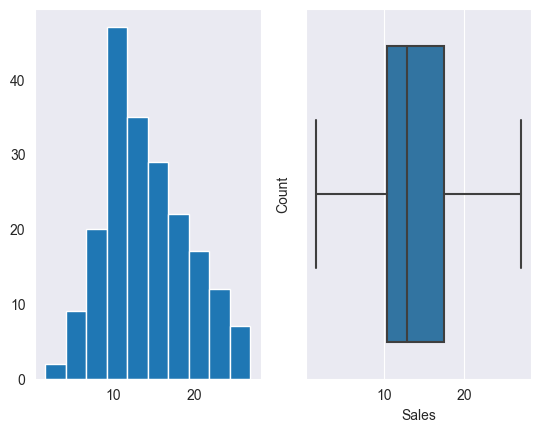

In [11]:
for col in data.columns:
  print(col)
  print('Skew', data[col].skew())
  plt.subplot(1, 2, 1)
  data[col].hist(bins=10, grid=False)
  plt.subplot(1, 2, 2)
  sns.boxplot(x=data[col])
  plt.ylabel('Count')
  plt.show()

In [12]:
# Dataset is stored in a pandas datafreame. Let us take out all the variables in a numpy array

sales = data.Sales.values.reshape(len(data['Sales']), 1)
tv = data.TV.values.reshape(len(data['TV']), 1)
radio = data.Radio.values.reshape(len(data['Radio']), 1)
newspaper = data.Newspaper.values.reshape(len(data['Newspaper']), 1)

In [14]:
tv_model = LinearRegression()
tv_model.fit(tv, sales)

coef_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))
coef_tv = list(coef_tv)
coef_tv

[7.032593549127695, 0.04753664043301975]

In [15]:
radio_model = LinearRegression()
radio_model.fit(radio, sales)

coef_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coef_radio = list(coef_radio)
coef_radio

[9.311638095158283, 0.20249578339243965]

In [16]:
newspaper_model = LinearRegression()
newspaper_model.fit(newspaper, sales)

coef_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coef_newspaper = list(coef_newspaper)
coef_newspaper

[12.35140706927816, 0.05469309847227336]

In [17]:
dict_sales = {}
dict_sales['tv'] = coef_tv
dict_sales['radio'] = coef_radio
dict_sales['newspaper'] = coef_newspaper

metric_df_slr = pd.DataFrame(dict_sales)
metric_df_slr.index = ['Intercept', 'Coefficient']
metric_df_slr.T

,Intercept,Coefficient
tv,7.032594,0.047537
radio,9.311638,0.202496
newspaper,12.351407,0.054693


In [19]:
tv_rsq = tv_model.score(tv, sales)
radio_rsq = radio_model.score(radio, sales)
newspaper_rsq = newspaper_model.score(newspaper, sales)

list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]

print(tv_rsq)
print(radio_rsq)
print(newspaper_rsq)

0.611875050850071
0.33203245544529525
0.05212044544430516


In [20]:
metric_df_slr.loc['R-squared'] =list_rsq
metric_df_slr

,tv,radio,newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-squared,0.611875,0.332032,0.052120


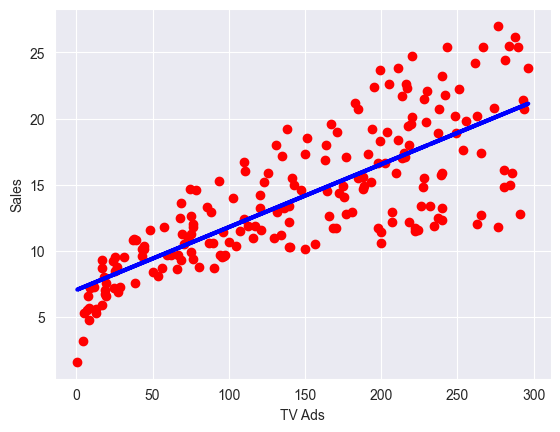

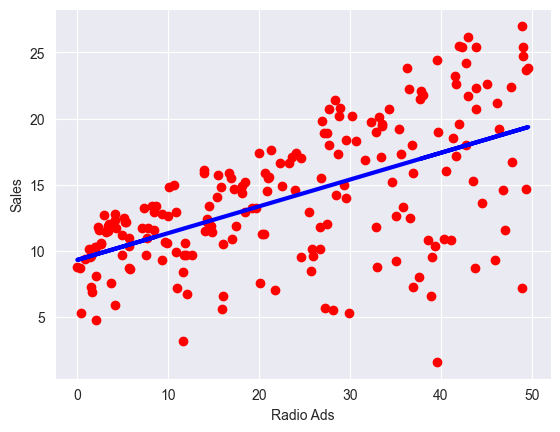

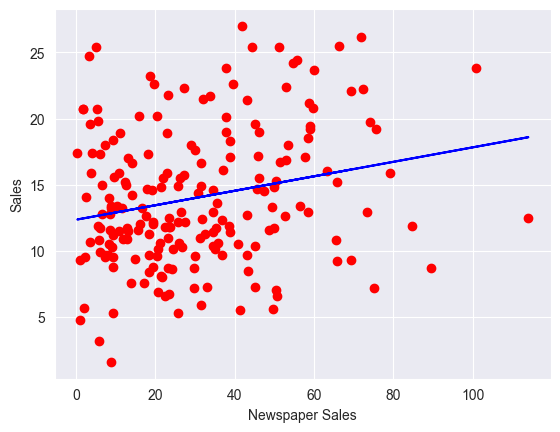

In [26]:
plt.scatter(tv, sales, color='red')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(tv, tv_model.predict(tv), color='blue', linewidth=3)
plt.show()

plt.scatter(radio, sales, color='red')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(radio, radio_model.predict(radio), color='blue', linewidth=3)
plt.show()

plt.scatter(newspaper, sales, color='red')
plt.xlabel('Newspaper Sales')
plt.ylabel('Sales')
plt.plot(newspaper, newspaper_model.predict(newspaper), color='blue')
plt.show()

In [27]:
#Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(data[['TV', 'Radio', 'Newspaper']], data['Sales'])

LinearRegression()

In [29]:
data['sales_predicted'] = mlr_model.predict(data[['TV', 'Radio', 'Newspaper']])
data['Error'] = (data['sales_predicted'] - data['Sales'])**2
mse_mlr = data['Error'].mean()
mse_mlr

2.784126314510936

In [31]:
mlr_model.score(data[['TV', 'Radio', 'Newspaper']], data['Sales'])

0.8972106381789522

In [35]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula='Sales ~ TV+Radio+Newspaper', data=data).fit()
lm1.params
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        14:25:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print('Parameters:', lm1.params)
print('Pvalues:', lm1.pvalues)
print('Standard Errors:', lm1.bse)
print('Confidence Interval:', lm1.conf_int())
print('Error Covariance Matrix:', lm1.cov_params())

Parameters: Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
Pvalues: Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
Standard Errors: Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
Confidence Interval:                   0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
Error Covariance Matrix:            Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875e-05


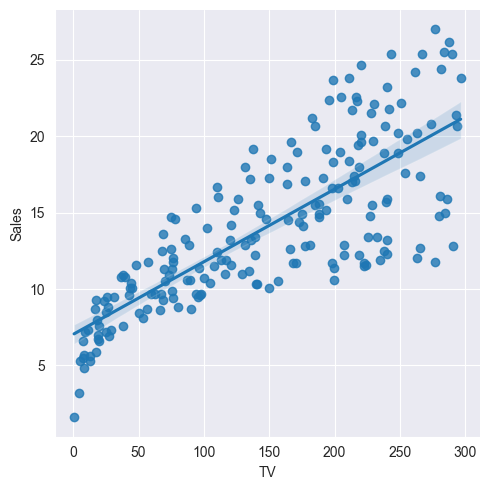

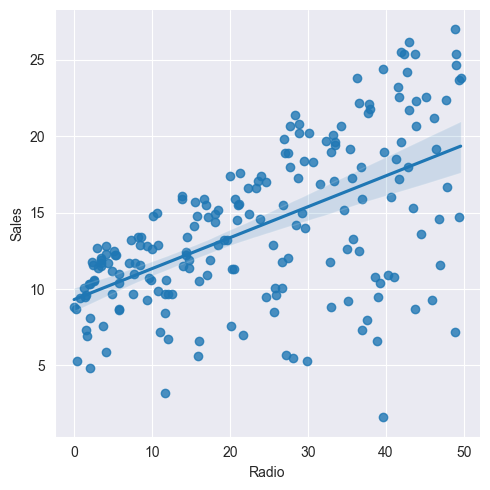

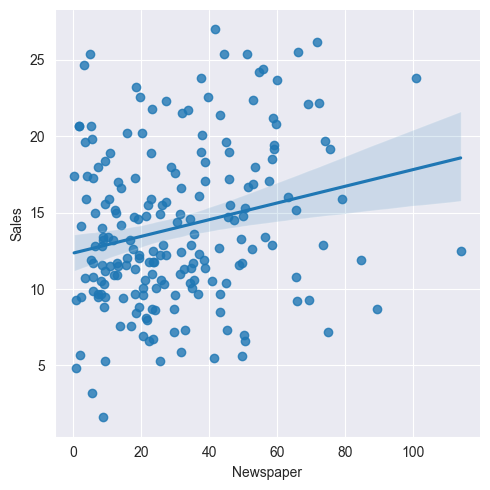

In [37]:
sns.lmplot(x='TV', y='Sales', data=data)
sns.lmplot(x='Radio', y='Sales', data=data)
sns.lmplot(x='Newspaper', y='Sales', data=data)

In [39]:
# Model Evaluation: Cross Validation and Bootstrap
data['tv&Radio'] = data['TV'] * data['Radio']
data.drop(['Error', 'sales_predicted'], inplace=True, axis=1)

In [40]:
import statsmodels.formula.api as smf

lm2 = smf.ols(formula='Sales ~ TV+Radio+Newspaper', data=data).fit()
lm2.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [41]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        14:30:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
features = [i for i in data.columns if i not in ('Sales', 'TV&Radio')]
features_added = [i for i in data.columns if i not in 'Sales']
target = 'Sales'

train, test = train_test_split(data, test_size=0.10, train_size=0.9)
train, validation = train_test_split(train, test_size=0.2, train_size=0.8)
train.shape, validation.shape, test.shape

((144, 5), (36, 5), (20, 5))

In [45]:
mlr = LinearRegression()
mlr.fit(train[features], train[target])

print('R_squared:', mlr.score(train[features], train[target]))
se_train = (train[target] - mlr.predict(train[features])) ** 2
mse_train = se_train.mean()
print('MSE', mse_train)

print('R-squared:', mlr.score(validation[features], validation[target]))
se_validation = (validation[target] - mlr.predict(validation[features]))**2
mse_val = se_validation.mean()
print('MSE', mse_val)

R_squared: 0.9757311176252528
MSE 0.6372810016120058
R-squared: 0.9703580985944857
MSE 0.8023404001552581


In [51]:
mlr_added_feature = LinearRegression()
mlr_added_feature.fit(train[features_added], train[target])

print('R-squared:', mlr_added_feature.score(train[features_added], train[target]))
se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE:', mse_train)


print('R-squared', mlr_added_feature.score(validation[features_added], validation[target]))
se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE:', mse_val)

R-squared: 0.9757311176252528
MSE: 0.6372810016120058
R-squared 0.9703580985944857
MSE: 0.8023404001552581


In [54]:
#Regularization

from sklearn.linear_model import Lasso, Ridge

ridge = Ridge()
ridge.fit(train[features_added], train[target])

print('R-squared:', ridge.score(train[features_added], train[target]))
se_train = (train[target] - ridge.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE', mse_train)

R-squared: 0.9757311175700307
MSE 0.6372810030620912


In [56]:
print('R-squared:', ridge.score(validation[features_added], validation[target]))
se_val = (validation[target] - ridge.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE', mse_val)

R-squared: 0.9703584501820752
MSE 0.8023308834605172


In [58]:
lasso = Lasso()
lasso.fit(train[features_added], train[target])

print('RMSE:', lasso.score(train[features_added], train[target]))
se_train = (train[target] - lasso.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE:', mse_train)

RMSE: 0.9748392838241839
MSE: 0.6606998277961058


In [59]:
print('RMSE:', lasso.score(validation[features_added], validation[target]))
se_val = (validation[target] - lasso.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE:', mse_val)

RMSE: 0.9707899037993235
MSE: 0.7906523928274211


In [61]:
#K-Fold
from sklearn.model_selection import cross_val_score

ridgeCV = Ridge()
cvs = cross_val_score(ridgeCV, data[features_added], data[target], cv=10)
print('Mean Score:', cvs.mean())
print('Confidence Interval:')
cvs.mean() - cvs.std(), cvs.mean()+ cvs.std()

Mean Score: 0.9649887636257694
Confidence Interval:


(0.9430473456799697, 0.986930181571569)

In [62]:
import statsmodels.formula.api as smf

lm2 = smf.ols(formula='Sales ~ TV', data=data).fit()
lm2.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [63]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        14:53:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

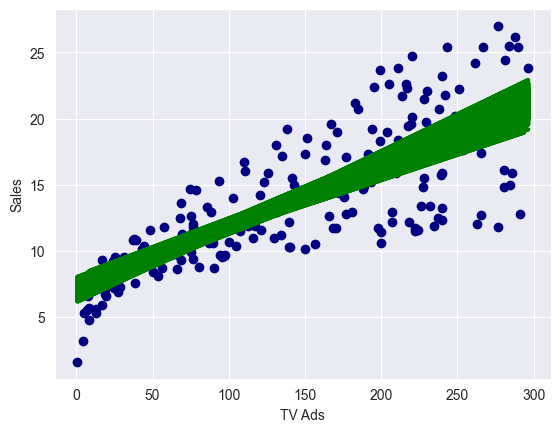

In [64]:
import statsmodels.formula.api as smf

Slope = []
for i in range(1000):
  bootstrap_df = data.sample(n=200, replace=True)
  lm3 = smf.ols(formula='Sales ~TV', data=bootstrap_df).fit()
  Slope.append(lm3.params.TV)

  plt.xlabel('TV Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['TV'], lm3.predict(bootstrap_df['TV']), color='green', linewidth=3)

plt.scatter(data['TV'], data['Sales'], color=(0, 0, 0.5))
plt.show()